# Import libraries and datasets

In [1]:
import pandas as pd
import numpy as np 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy 


In [2]:
path = r'C:\Users\ctede\OneDrive\Desktop\Instacart Basket Analysis'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'max_orders_over_5_NEW.pkl'))
df_2 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'max_orders_over_5.pkl'))

In [3]:
df.shape

(30171424, 34)

In [3]:
#Change settings to show all variables/columns
pd.set_option('display.max_columns', None)

# 2 Prices each hour / Most popular products each hour

## Creating a line chart

In [6]:
#Need randomized values from the dataframe
np.random.rand(10)
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [7]:
big = df[dev] #stores true values (70%)
small = df[~dev] #stores false values (30%)


KeyboardInterrupt



In [8]:
len(big) + len(small)

30171424

In [28]:
df_3 = small[['order_hour_of_day', 'prices']]
df_4 = small[['order_dow', 'prices']]

In [29]:
df_3.groupby('order_hour_of_day').agg({'prices' : ['mean']})

,prices
,mean
order_hour_of_day,
0,10.264275
1,11.548030
2,9.340513
3,12.085648
4,8.847809
5,10.841824
6,14.025567
7,12.862791


In [31]:
#transpose the above list
df_3.groupby('order_hour_of_day').agg({'prices' : ['mean']}).T.to_clipboard()

In [34]:
#transpose the order_dow and prices list
df_4.groupby('order_dow').agg({'prices' : ['mean']}).T.to_clipboard()

In [12]:
#Change settings to show all variables/columns
pd.set_option('display.max_columns', None)

In [13]:
df.head()

,customer_id,Gender,State,Age,date_joined,n_dependents,fam_status,income,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,new_busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order_price,spending_flag,order_frequency,Check,Regions,customer_profile,order_freq_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Fewest orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,both,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Regularly busy,Fewest orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,both,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN,Regular customer


NameError: name 'xlim' is not defined

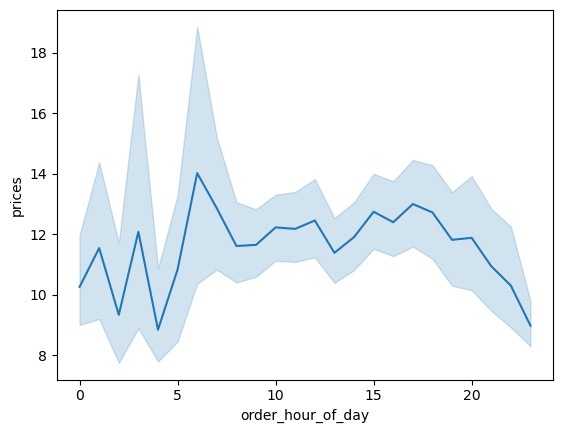

In [25]:
#Prices each hour
line = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')


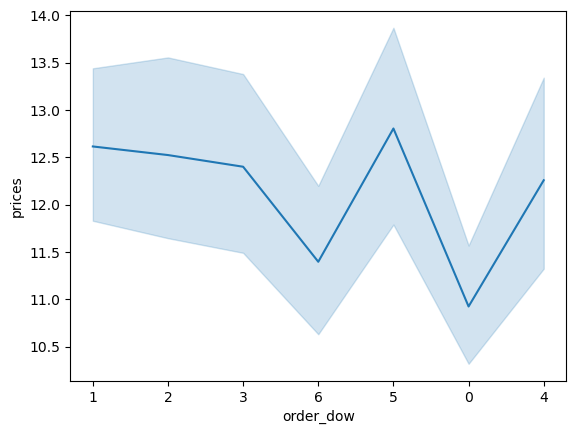

In [32]:
#order day of week and prices line chart 
line = sns.lineplot(data = df_4, x = 'order_dow', y = 'prices')

# 4 Popular products ordered

Text(0.5, 1.0, 'Top 10 Most Popular Items at Instacart')

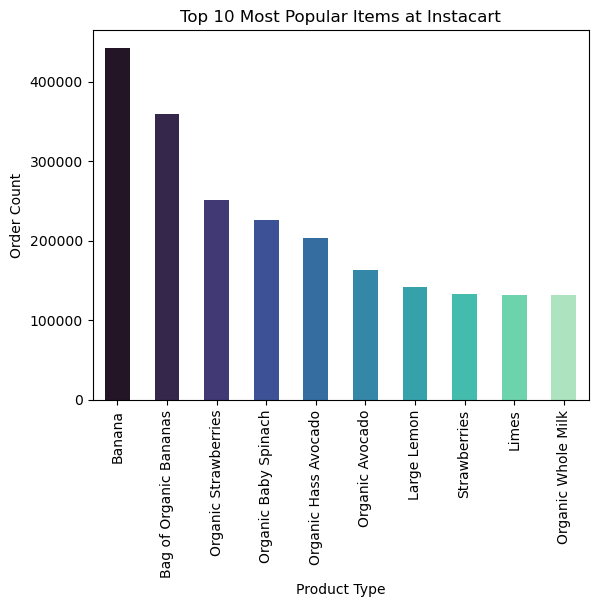

In [38]:
palette = sns.color_palette('mako', 10)
bar_popular_products = df['product_name'].value_counts().head(10).plot.bar(color=palette)
plt.xlabel("Product Type")
plt.ylabel("Order Count")
plt.title("Top 10 Most Popular Items at Instacart")

Text(0.5, 1.0, 'Number of Orders by Department')

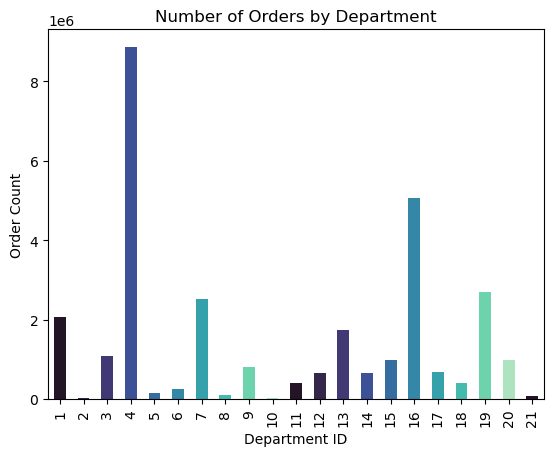

In [47]:
#Which department ids have the most orders? 
df['department_id'].value_counts().sort_index().plot.bar(color = palette)
plt.xlabel("Department ID")
plt.ylabel("Order Count")
plt.title("Number of Orders by Department")

Text(0, 0.5, 'Number of Orders')

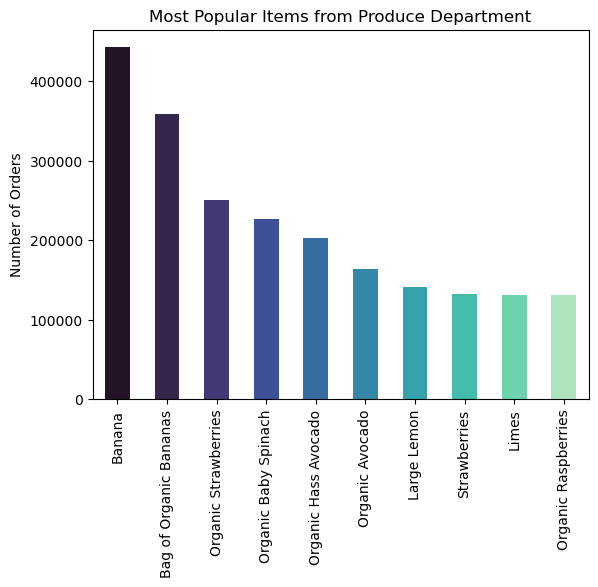

In [66]:
#Look at department 4 only 
#df_ords_prods_merge[df_ords_prods_merge['user_id']==129928]['order_dow'].value_counts()
palette =sns.color_palette('mako', 10)
df[df['department_id']==4]['product_name'].value_counts().head(10).plot.bar(color=palette)
plt.title("Most Popular Items from Produce Department")
plt.ylabel("Number of Orders")

# 5 Customers

Text(0.5, 1.0, 'Number of Orders based on Customer Frequency')

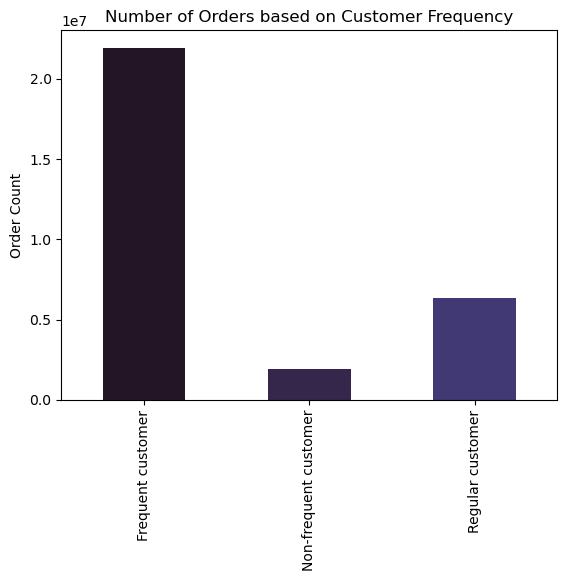

In [51]:
#How often do customers return? order frequency flag
df['order_freq_flag'].value_counts().sort_index().plot.bar(color = palette)
plt.ylabel("Order Count")
plt.title("Number of Orders based on Customer Frequency")

In [65]:
#bar chart to show age and fam_status
crosstab = pd.crosstab(df['Age']>=18, df['fam_status'], dropna = False)
crosstab

fam_status,divorced/widowed,living with parents and siblings,married,single
Age,,,,
True,2577880,1444081,21188130,4961333


<AxesSubplot:xlabel='divorced/widowed,living with parents and siblings,married,single'>

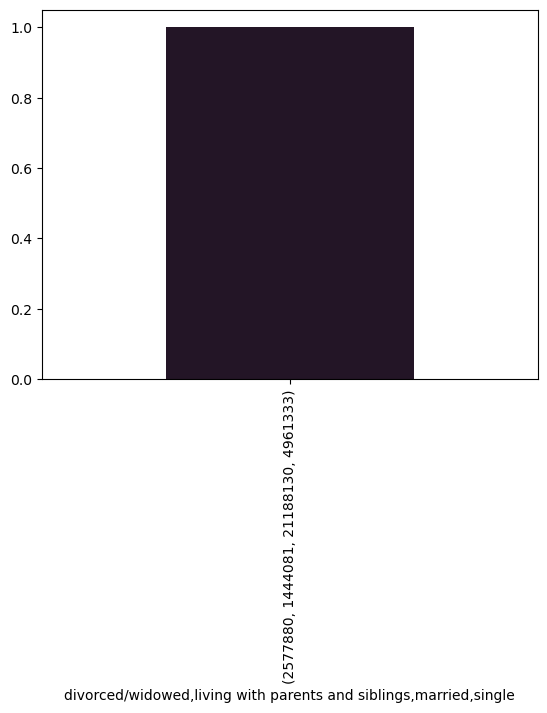

In [66]:
crosstab.value_counts().plot.bar(color=palette)

Text(0.5, 1.0, 'Number of Orders based on Region')

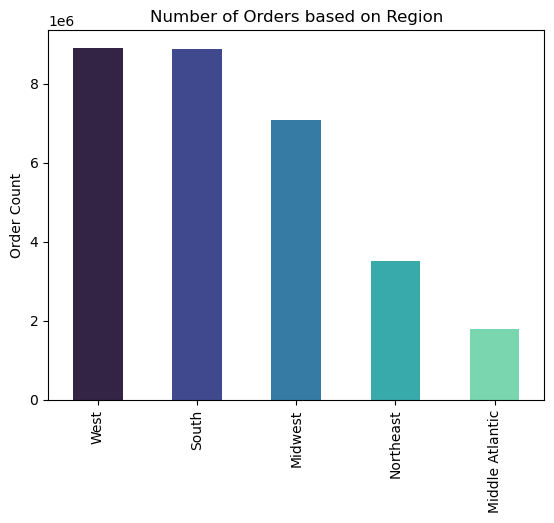

In [70]:
#5c: customers and regions 
palette = sns.color_palette('mako', 5)
df['Regions'].value_counts().plot.bar(color=palette)
plt.ylabel("Order Count")
plt.title("Number of Orders based on Region")

In [4]:
#Show counts for each region
df['Regions'].value_counts()

West               8903829
South              8873122
Midwest            7070122
Northeast          3525295
Middle Atlantic    1799056
Name: Regions, dtype: int64

# 5d Relationship btwn age and family status regarding ordering habits

In [12]:
#Show number of dependents for each family status
df[['fam_status','n_dependents']].groupby('fam_status').agg({'n_dependents':['mean']})

,n_dependents
,mean
fam_status,
divorced/widowed,0.000000
living with parents and siblings,1.986320
married,2.003442
single,0.000000


In [5]:
#random sample df for age and prices
df_4 = small[['Age', 'prices']]

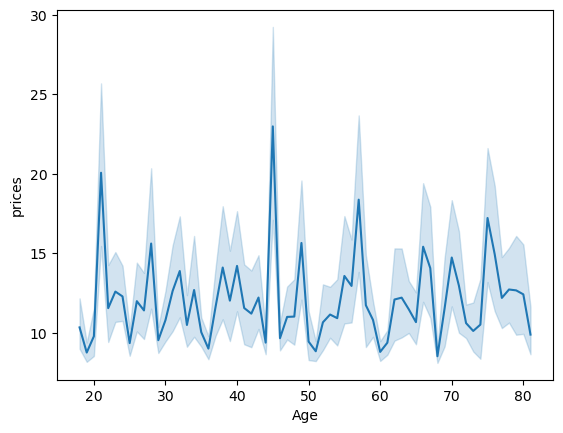

In [6]:
#Which age spends the most? 
line = sns.lineplot(data = df_4, x = 'Age', y = 'prices')

In [8]:
df_4.groupby('Age').agg({'prices' : ['mean']}).head(40)

,prices
,mean
Age,
18,10.322674
19,8.738227
20,9.764831
21,20.064117
22,11.534070
23,12.579044
24,12.274071
25,9.332868


In [9]:
#Which family status spends the most? 
df_5 = small[['fam_status', 'prices']]

Text(0.5, 0, 'Family Status')

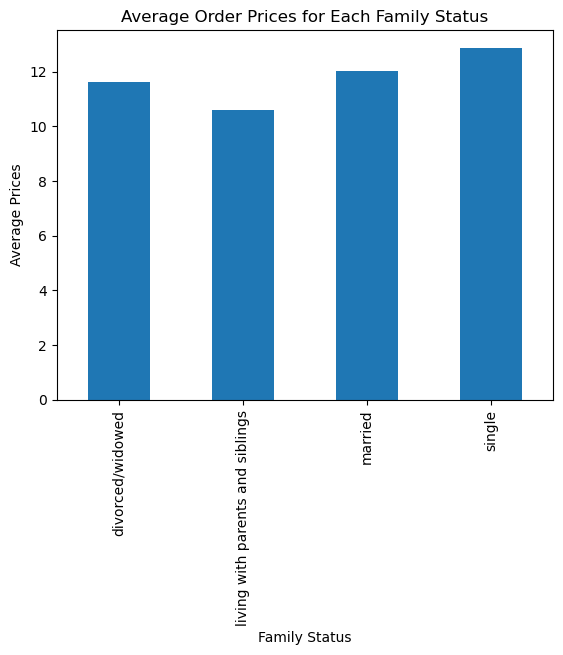

In [22]:

df_5.groupby('fam_status').agg({'prices' : ['mean']}).sort_index().plot.bar(legend=None)
plt.ylabel("Average Prices")
plt.title("Average Order Prices for Each Family Status")
plt.xlabel("Family Status")

In [26]:
df[['fam_status','Age','prices']].groupby('fam_status').agg({'Age':['mean'], 'prices':['mean']})

,Age,prices
,mean,mean
fam_status,,
divorced/widowed,70.519078,11.595779
living with parents and siblings,19.501729,10.657297
married,51.496429,11.860160
single,38.606608,12.334552


Text(0.5, 0, 'Family Status')

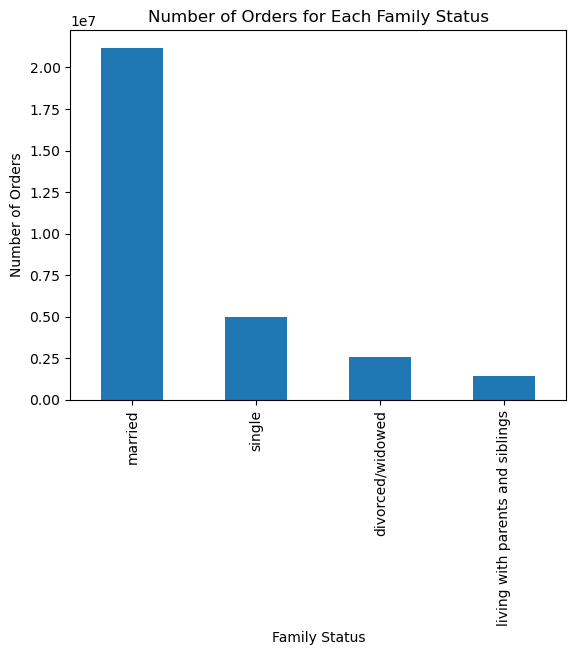

In [5]:
#Show number of orders for each family status -- who orders the most? 
df['fam_status'].value_counts().plot.bar(legend=None)
plt.ylabel("Number of Orders")
plt.title("Number of Orders for Each Family Status")
plt.xlabel("Family Status")

# 5e Age, income, types of goods, other demographics

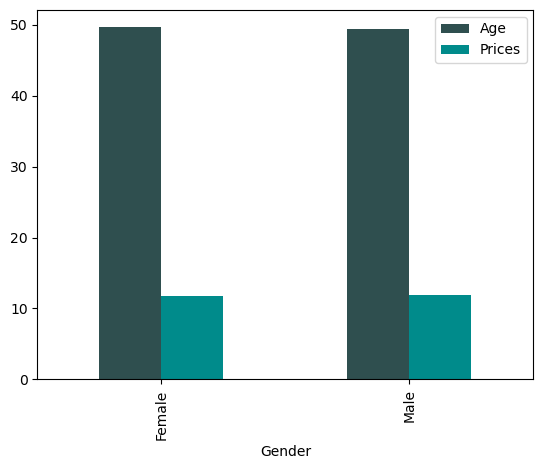

In [34]:
#gender, price
df[['Gender','Age','prices']].groupby('Gender').agg({'Age':['mean'], 'prices':['mean']}).plot.bar(color=['darkslategray','darkcyan'])
plt.legend(['Age', 'Prices'])

In [35]:
df[['Gender','Age','prices']].groupby('Gender').agg({'Age':['mean'], 'prices':['mean']})

,Age,prices
,mean,mean
Gender,,
Female,49.590144,11.812385
Male,49.353013,11.903049


In [40]:
df[['Regions', 'prices','income']].groupby('Regions').agg({'prices':['mean'],'income':['mean']})

,prices,income
,mean,mean
Regions,,
Middle Atlantic,10.239125,99369.562358
Midwest,12.656311,100474.191478
Northeast,12.024090,100115.619638
South,12.143295,99455.744664
West,11.201151,99468.748349


Text(0.5, 1.0, 'Average Prices of Each Order by Region')

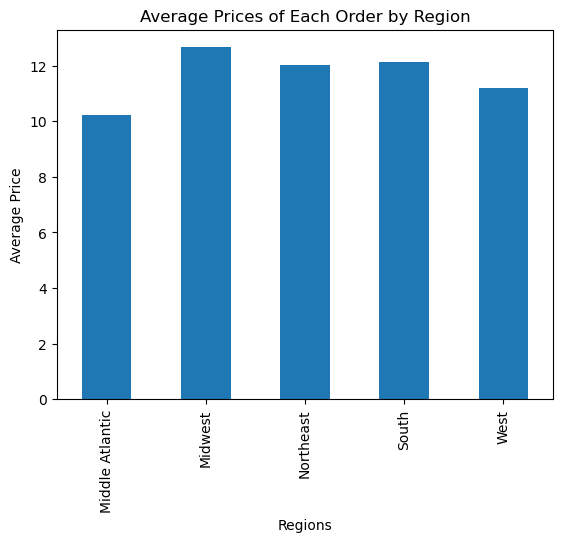

In [46]:
df[['Regions', 'prices']].groupby('Regions').agg({'prices':['mean']}).plot.bar(legend=None)
plt.ylabel("Average Price")
plt.title("Average Prices of Each Order by Region")

Text(0.5, 1.0, 'Average Customer Income by Region')

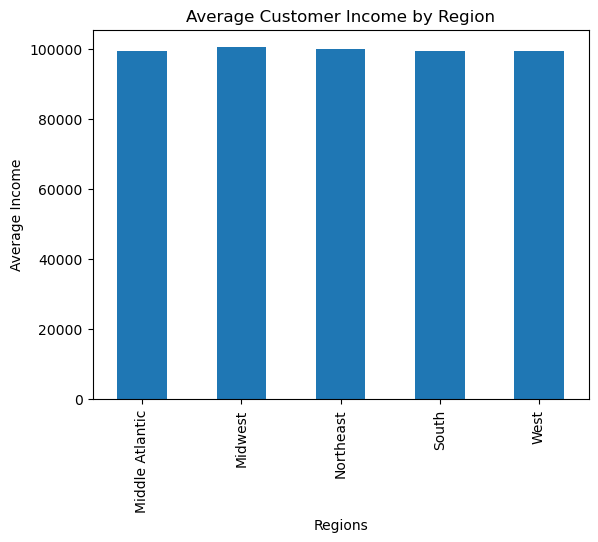

In [47]:
df[['Regions', 'income']].groupby('Regions').agg({'income':['mean']}).plot.bar(legend=None)
plt.ylabel("Average Income")
plt.title("Average Customer Income by Region")

In [48]:
df.head()

,customer_id,Gender,State,Age,date_joined,n_dependents,fam_status,income,order_id,order_number,...,busiest_period_of_day,max_order,loyalty_flag,avg_order_price,spending_flag,order_frequency,Check,Regions,customer_profile,order_freq_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Fewest orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Most orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Most orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Fewest orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Most orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN,Regular customer


In [49]:
#Which department is the most popular? 
df[['department_id', 'prices', 'order_number']].groupby('department_id').agg({'prices':['mean'],'order_number':['mean']})

,prices,order_number
,mean,mean
department_id,,
1,7.731960,16.559281
2,6.944558,18.545174
3,7.861063,18.241619
4,7.979722,18.878740
5,8.153408,16.511001
6,7.678460,17.588416
7,7.684197,18.285281
8,7.887383,16.387640


Text(0.5, 1.0, 'Average Order Price for Each Department')

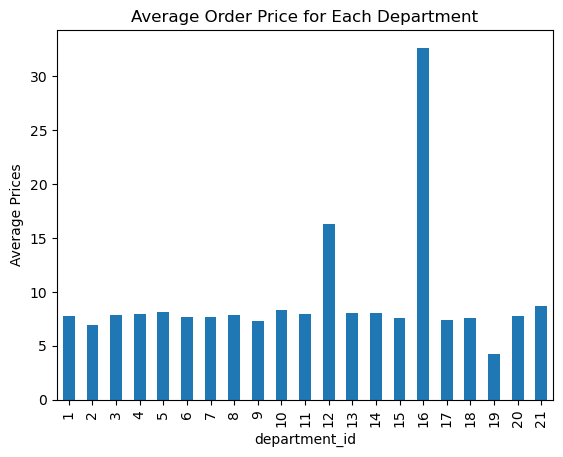

In [12]:
#Show each department id and avg. prices
palette = sns.color_palette('mako', 21)
df[['department_id','prices']].groupby('department_id').agg({'prices':['mean']}).plot.bar(legend=None)
plt.ylabel("Average Prices")
plt.title("Average Order Price for Each Department")

In [6]:
df[df['department_id']==16].head(20)

,customer_id,Gender,State,Age,date_joined,n_dependents,fam_status,income,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,new_busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order_price,spending_flag,order_frequency,Check,Regions,customer_profile,order_freq_flag
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,both,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Regularly busy,Fewest orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,both,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN,Regular customer
5,26711,Female,Missouri,48,1/1/2017,3,married,165665,2984525,4,1,17,19.0,38928,1,1,both,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN,Regular customer
6,26711,Female,Missouri,48,1/1/2017,3,married,165665,2505178,6,1,8,21.0,38928,2,1,both,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN,Regular customer
7,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,38928,3,1,both,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN,Regular customer
8,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,38928,1,1,both,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN,Regular customer
25,33890,Female,New Mexico,36,1/1/2017,0,single,59285,2770784,7,3,22,25.0,31343,3,0,both,Shredded Mild Cheddar Cheese,21,16,1.5,Low-range product,Regularly busy,Slowest days,Average orders,12,Regular customer,7.057534,Low spender,26.0,both,West,NaN,Non-frequent customer
26,33890,Female,New Mexico,36,1/1/2017,0,single,59285,2801781,8,2,11,30.0,31343,5,1,both,Shredded Mild Cheddar Cheese,21,16,1.5,Low-range product,Regularly busy,Regularly busy,Most orders,12,Regular customer,7.057534,Low spender,26.0,both,West,NaN,Non-frequent customer
27,33890,Female,New Mexico,36,1/1/2017,0,single,59285,2225391,11,0,14,29.0,31343,2,1,both,Shredded Mild Cheddar Cheese,21,16,1.5,Low-range product,Busiest day,Busiest days,Most orders,12,Regular customer,7.057534,Low spender,26.0,both,West,NaN,Non-frequent customer
33,33890,Female,New Mexico,36,1/1/2017,0,single,59285,2135662,1,6,17,0.0,44987,5,0,both,Heavy Whipping Cream,53,16,9.1,Mid-range product,Regularly busy,Regularly busy,Most orders,12,Regular customer,7.057534,Low spender,26.0,both,West,NaN,Non-frequent customer


Text(0, 0.5, 'Number of Orders')

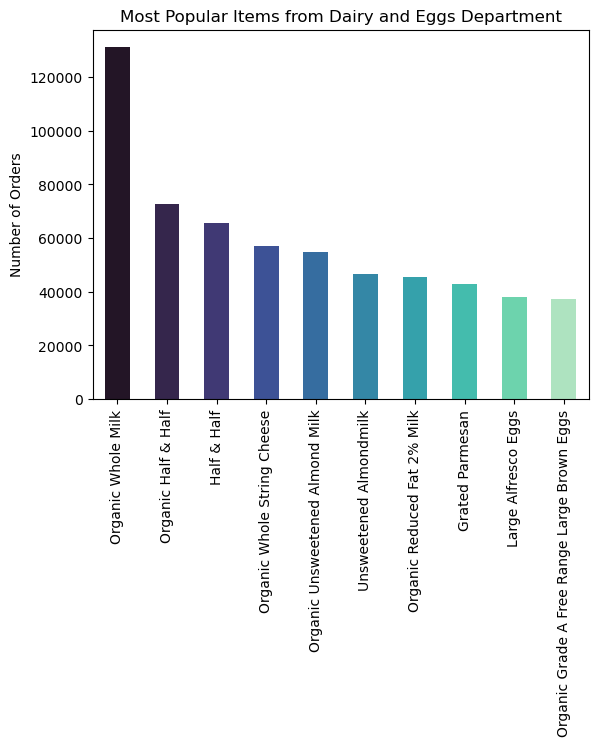

In [9]:
#Look at departments 16 only 
#df_ords_prods_merge[df_ords_prods_merge['user_id']==129928]['order_dow'].value_counts()
palette =sns.color_palette('mako', 10)
df[df['department_id']==16]['product_name'].value_counts().head(10).plot.bar(color=palette)
plt.title("Most Popular Items from Dairy and Eggs Department")
plt.ylabel("Number of Orders")

Text(0, 0.5, 'Number of Orders')

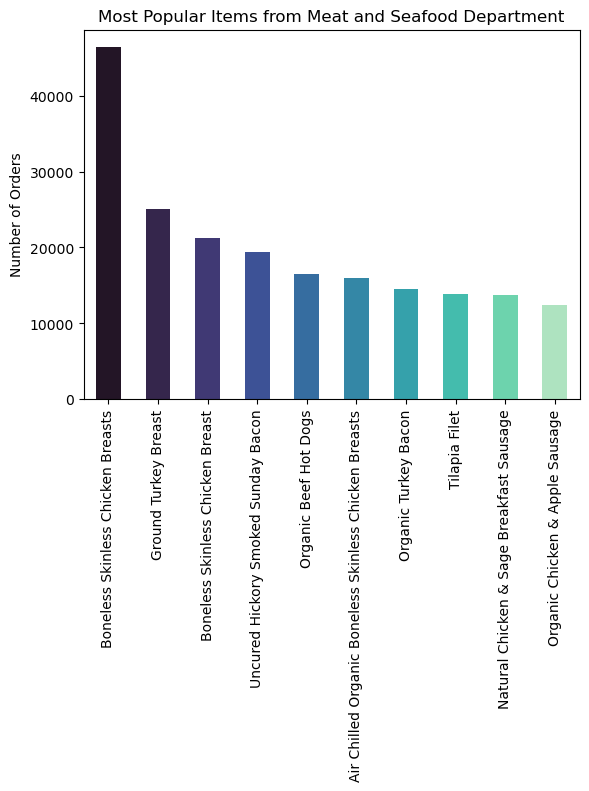

In [10]:
#Look at departments 12 only 
#df_ords_prods_merge[df_ords_prods_merge['user_id']==129928]['order_dow'].value_counts()
palette =sns.color_palette('mako', 10)
df[df['department_id']==12]['product_name'].value_counts().head(10).plot.bar(color=palette)
plt.title("Most Popular Items from Meat and Seafood Department")
plt.ylabel("Number of Orders")

Text(0, 0.5, 'Number of Orders')

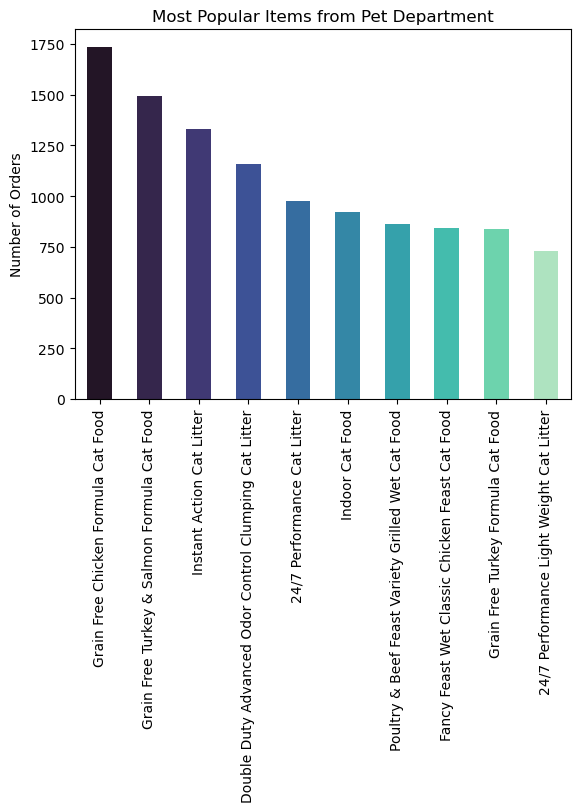

In [17]:
#Check another department (i.e. 8)
palette =sns.color_palette('mako', 10)
df[df['department_id']==8]['product_name'].value_counts().head(10).plot.bar(color=palette)
plt.title("Most Popular Items from Pet Department")
plt.ylabel("Number of Orders")

In [23]:
#Max price orders for each department
#df[['department_id','prices']].groupby('department_id').agg({'prices':['mean']})
df[['department_id','prices']].groupby('department_id').agg({'prices':['max']})

,prices
,max
department_id,
1,15.0
2,15.0
3,15.0
4,15.0
5,15.0
6,15.0
7,15.0
8,15.0


In [24]:
#Look at prices over 100
df.loc[df['prices'] > 100]

,customer_id,Gender,State,Age,date_joined,n_dependents,fam_status,income,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,new_busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order_price,spending_flag,order_frequency,Check,Regions,customer_profile,order_freq_flag
5547,117740,Female,Oregon,55,1/1/2017,1,married,292759,3369785,30,1,10,14.0,21553,4,0,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Busiest days,Most orders,84,Loyal customer,36.928431,High spender,4.0,both,West,NaN,Frequent customer
10303,31590,Female,Montana,46,1/1/2017,0,single,154076,830157,13,1,8,12.0,21553,3,0,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Busiest days,Average orders,38,Regular customer,58.139865,High spender,8.0,both,West,NaN,Frequent customer
34492,2823,Female,Kentucky,80,1/2/2017,0,divorced/widowed,120519,2699729,1,3,17,0.0,21553,3,0,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Slowest days,Most orders,14,Regular customer,133.805932,High spender,18.0,both,South,NaN,Regular customer
50074,58136,Male,Virginia,23,1/3/2017,0,single,108451,2623888,2,6,17,5.0,21553,17,0,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Regularly busy,Most orders,43,Loyal customer,683.220938,High spender,8.0,both,South,NaN,Frequent customer
50075,58136,Male,Virginia,23,1/3/2017,0,single,108451,1119741,4,0,16,7.0,21553,5,1,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Busiest day,Busiest days,Most orders,43,Loyal customer,683.220938,High spender,8.0,both,South,NaN,Frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32390922,5519,Female,Georgia,78,4/1/2020,3,married,262610,288789,46,3,16,5.0,21553,19,1,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Slowest days,Most orders,53,Loyal customer,69.638604,High spender,7.0,both,South,NaN,Frequent customer
32390923,5519,Female,Georgia,78,4/1/2020,3,married,262610,1615768,48,5,8,4.0,21553,23,1,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Regularly busy,Average orders,53,Loyal customer,69.638604,High spender,7.0,both,South,NaN,Frequent customer
32390924,5519,Female,Georgia,78,4/1/2020,3,married,262610,1744232,51,5,9,7.0,21553,27,1,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Regularly busy,Fewest orders,53,Loyal customer,69.638604,High spender,7.0,both,South,NaN,Frequent customer
32396990,140589,Male,Maryland,26,4/1/2020,0,single,154845,1244840,6,5,17,24.0,33664,12,0,both,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Regularly busy,Regularly busy,Most orders,9,New customer,876.974783,High spender,16.0,both,South,NaN,Regular customer


In [33]:
#Turn the outliers into NaN values 
df.loc[df['prices'] > 100, 'prices'] = np.nan

In [25]:
df.shape

(30171424, 34)

In [16]:
#Price of organic whole milk 
df[df['product_name']=="Organic Whole Milk"]['prices']

907         12.8
908         12.8
909         12.8
910         12.8
911         12.8
            ... 
32397053    12.8
32399355    12.8
32402932    12.8
32402933    12.8
32404604    12.8
Name: prices, Length: 131152, dtype: float64

In [34]:
#Max price orders for each department - recheck
df[['department_id','prices']].groupby('department_id').agg({'prices':['mean','min','max']})

prices           
                    mean  min   max
department_id                      
1               7.731960  1.0  15.0
2               6.944558  1.1  15.0
3               7.861063  1.0  15.0
4               7.979722  1.0  15.0
5               8.153408  1.0  15.0
6               7.678460  1.0  15.0
7               7.684197  1.0  15.0
8               7.887383  1.0  15.0
9               7.346977  1.0  15.0
10              8.343708  1.4  14.1
11              7.999466  1.0  15.0
12             16.300459  8.0  25.0
13              8.015317  1.0  20.0
14              8.031677  1.0  14.9
15              7.549985  1.0  15.0
16              8.336532  1.0  15.0
17              7.376057  1.0  15.0
18              7.630199  1.0  15.0
19              4.275691  1.6   7.0
20              7.786115  1.0  15.0
21              8.661264  1.0  15.0

Text(0.5, 1.0, 'Average Order Price for Each Department')

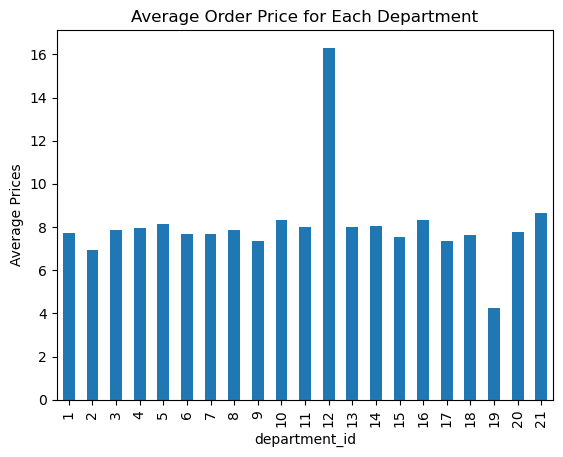

In [28]:
#Redo: Show each department id and avg. prices
palette = sns.color_palette('mako', 21)
df[['department_id','prices']].groupby('department_id').agg({'prices':['mean']}).plot.bar(legend=None)
plt.ylabel("Average Prices")
plt.title("Average Order Price for Each Department")

In [65]:
#Show department 12 max priced item 
#Fix later: df[df['department_id']==12, df['prices']==25]

InvalidIndexError: (0           False
1           False
2           False
3           False
4           False
            ...  
32404813    False
32404814    False
32404815    False
32404816    False
32404817    False
Name: department_id, Length: 30171424, dtype: bool, 0           False
1           False
2           False
3           False
4           False
            ...  
32404813    False
32404814    False
32404815    False
32404816    False
32404817    False
Name: prices, Length: 30171424, dtype: bool)

In [18]:
#Price of grain free chicken formula cat food
df[df['product_name']=="Grain Free Chicken Formula Cat Food"]['prices']

9702        5.8
9703        5.8
21812       5.8
162695      5.8
219668      5.8
           ... 
32255914    5.8
32309947    5.8
32325742    5.8
32325743    5.8
32357733    5.8
Name: prices, Length: 1735, dtype: float64

Text(0.5, 1.0, 'Average Number of Orders for Each Department')

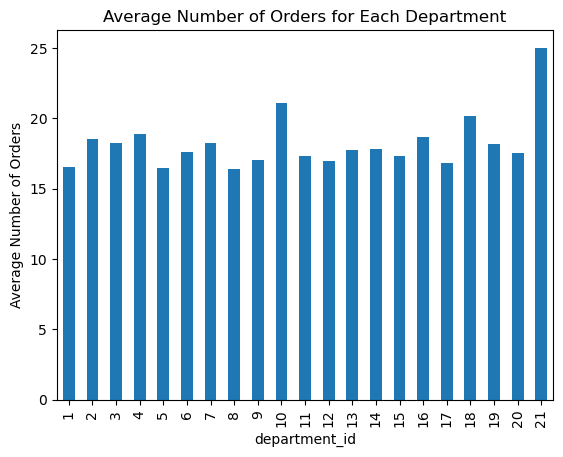

In [14]:
palette = sns.color_palette('mako', 21)
df[['department_id','order_number']].groupby('department_id').agg({'order_number':['mean']}).plot.bar(legend=None)
plt.ylabel("Average Number of Orders")
plt.title("Average Number of Orders for Each Department")

Text(0, 0.5, 'Number of Orders')

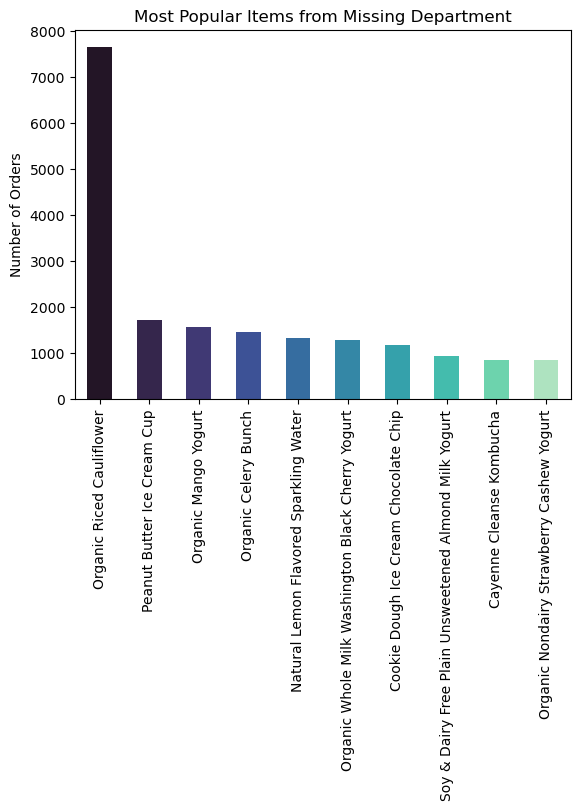

In [19]:
#Look at most popular item in each department
#Department 21 Missing
palette =sns.color_palette('mako', 10)
df[df['department_id']==21]['product_name'].value_counts().head(10).plot.bar(color=palette)
plt.title("Most Popular Items from Missing Department")
plt.ylabel("Number of Orders")

Text(0, 0.5, 'Number of Orders')

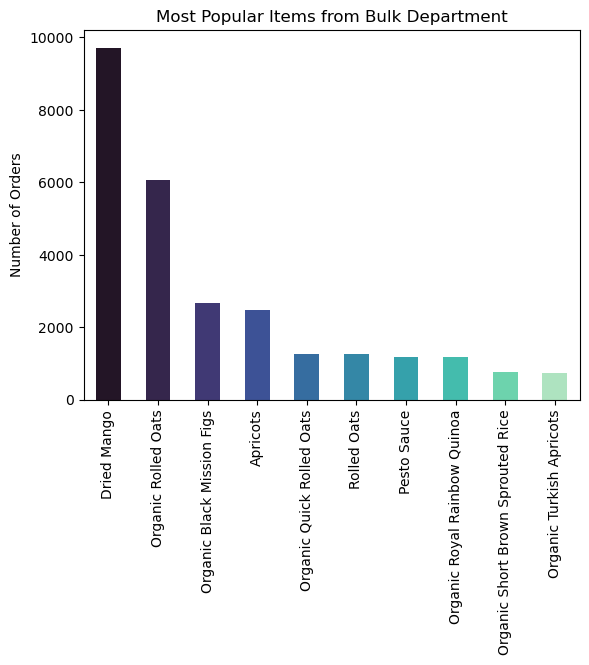

In [20]:
#Look at most popular item in each department
#Department 10 Bulk
palette =sns.color_palette('mako', 10)
df[df['department_id']==10]['product_name'].value_counts().head(10).plot.bar(color=palette)
plt.title("Most Popular Items from Bulk Department")
plt.ylabel("Number of Orders")

Text(0.5, 1.0, "Most Popular Departments for 'Married' Status")

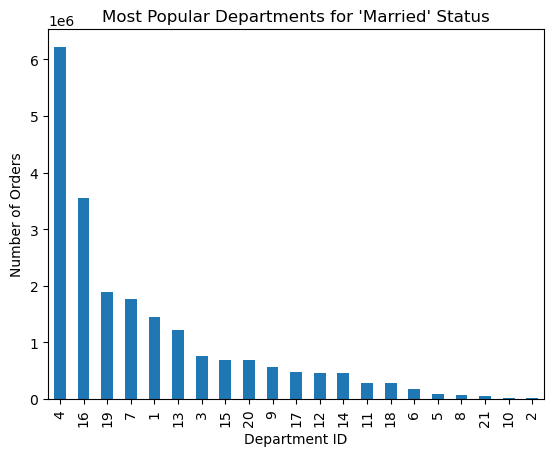

In [15]:
#5e cont. - Look at "married" status and what they are ordering
df[df['fam_status']=="married"]['department_id'].value_counts().plot.bar()
plt.ylabel("Number of Orders")
plt.xlabel("Department ID")
plt.title("Most Popular Departments for 'Married' Status")

<AxesSubplot:>

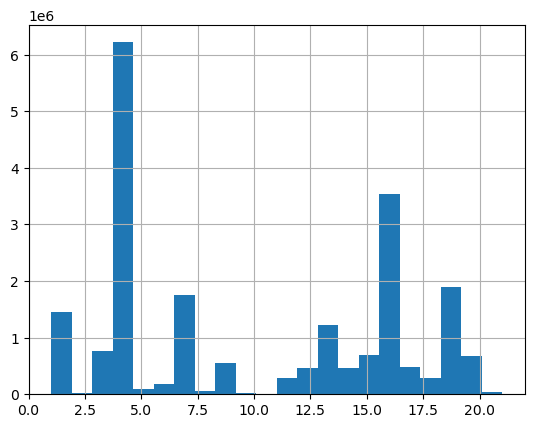

In [18]:
#histogram instead of bar chart for married status and popular department ids
df[df['fam_status']=="married"]['department_id'].hist(bins=22)

In [23]:
#Married df
df_married_only = df[df['fam_status']=="married"]

In [25]:
#Department 4 products 
palette=sns.color_palette('mako',10)
df_married_only[df_married_only['department_id']==4]['product_name'].value_counts().head(10)

Banana                    309969
Bag of Organic Bananas    252218
Organic Strawberries      176297
Organic Baby Spinach      158896
Organic Hass Avocado      142732
Organic Avocado           115451
Large Lemon                99371
Strawberries               93339
Limes                      92130
Organic Raspberries        91249
Name: product_name, dtype: int64

Text(0.5, 1.0, 'Most Popular Items from the Snacks Department')

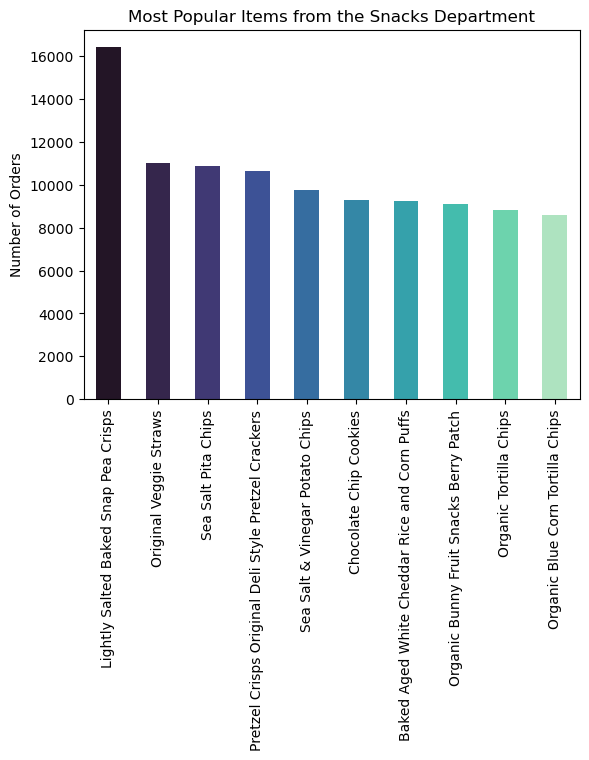

In [29]:
#Department 19 products 
palette=sns.color_palette('mako',10)
df_married_only[df_married_only['department_id']==19]['product_name'].value_counts().head(10).plot.bar(color=palette)
plt.ylabel("Number of Orders")
plt.title("Most Popular Items from the Snacks Department")

Text(0.5, 1.0, 'Most Popular Items from the Beverages Department')

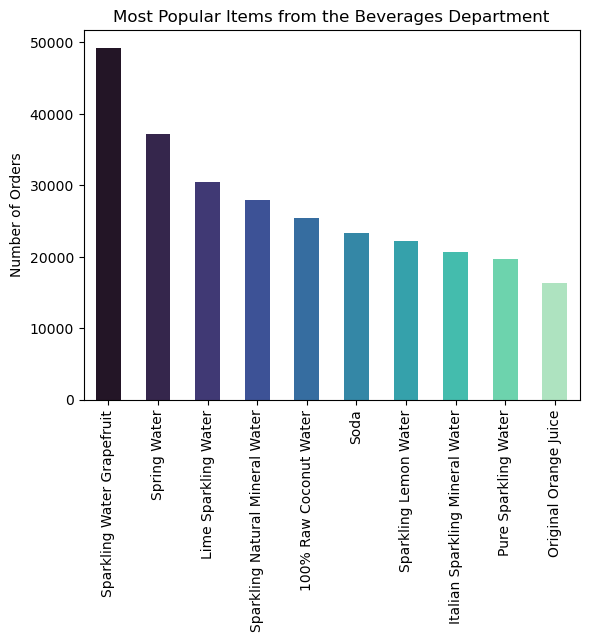

In [30]:
#Department 7 products 
palette=sns.color_palette('mako',10)
df_married_only[df_married_only['department_id']==7]['product_name'].value_counts().head(10).plot.bar(color=palette)
plt.ylabel("Number of Orders")
plt.title("Most Popular Items from the Beverages Department")

In [38]:
#Prices of snacks
df_married_only[df_married_only['product_name']=="Lightly Salted Baked Snap Pea Crisps"]['prices']

8345        5.1
13463       5.1
14515       5.1
17403       5.1
21224       5.1
           ... 
32393256    5.1
32393257    5.1
32394441    5.1
32397124    5.1
32397125    5.1
Name: prices, Length: 16387, dtype: float64

In [40]:
#Prices of snacks
df_married_only[df_married_only['product_name']=="Original Veggie Straws"]['prices']

4964        6.6
4965        6.6
27166       6.6
27167       6.6
27168       6.6
           ... 
32383877    6.6
32383878    6.6
32383879    6.6
32386812    6.6
32386813    6.6
Name: prices, Length: 11005, dtype: float64

In [39]:
#Prices of beverages
df_married_only[df_married_only['product_name']=="Sparkling Water Grapefruit"]['prices']

1792        4.2
1793        4.2
1794        4.2
1795        4.2
1796        4.2
           ... 
32401747    4.2
32401748    4.2
32401749    4.2
32401750    4.2
32401751    4.2
Name: prices, Length: 49275, dtype: float64

In [41]:
#Prices of beverages
df_married_only[df_married_only['product_name']=="Spring Water"]['prices']

4622        2.0
4623        2.0
4624        2.0
4625        2.0
7026        2.0
           ... 
32376572    2.0
32376573    2.0
32381535    2.0
32381536    2.0
32381537    2.0
Name: prices, Length: 37131, dtype: float64

Text(0.5, 1.0, "Most Popular Departments for 'Single' Status")

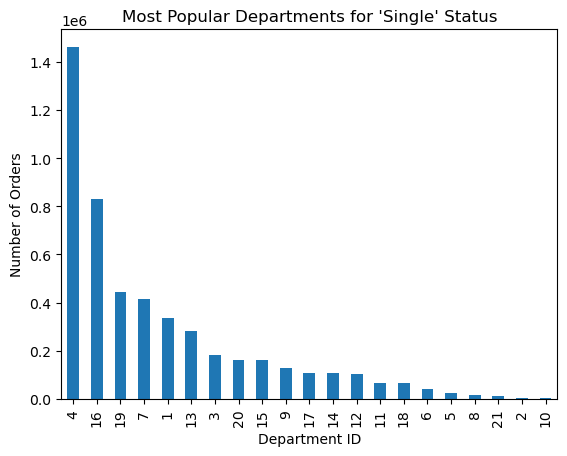

In [4]:
#5e cont. - Look at "single" status and what they are ordering
df[df['fam_status']=="single"]['department_id'].value_counts().plot.bar()
plt.ylabel("Number of Orders")
plt.xlabel("Department ID")
plt.title("Most Popular Departments for 'Single' Status")

In [5]:
#single only df
df_single_only = df[df['fam_status']=="single"]

Text(0.5, 1.0, 'Most Popular Items from the Snacks Department')

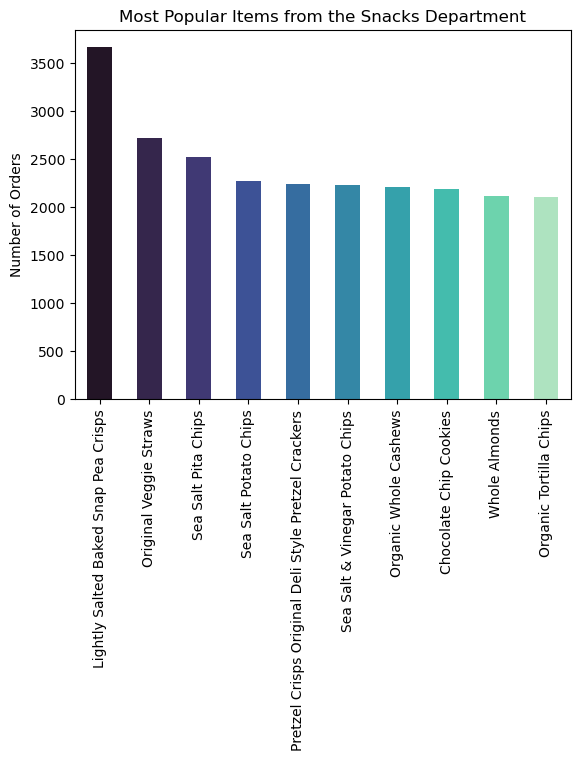

In [9]:
#show most popular item in dept 19
palette=sns.color_palette('mako',10)
df_single_only[df_single_only['department_id']==19]['product_name'].value_counts().head(10).plot.bar(color=palette)
plt.ylabel("Number of Orders")
plt.title("Most Popular Items from the Snacks Department")

Text(0.5, 1.0, 'Most Popular Items from the Beverages Department')

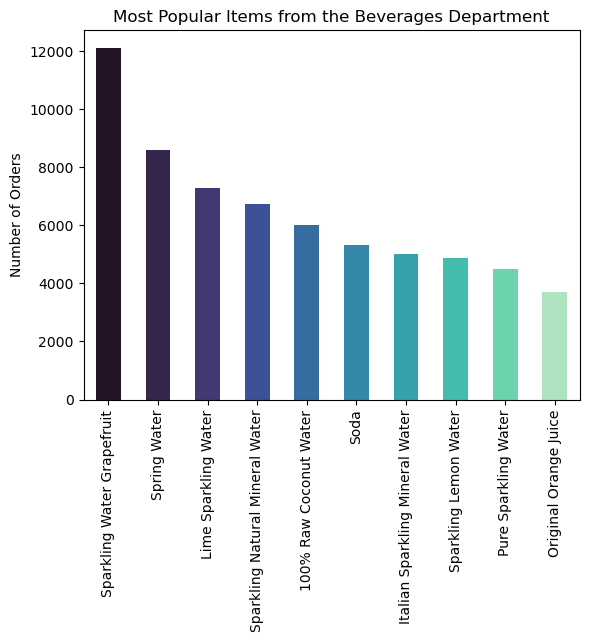

In [11]:
#popular items in beverages dpt
df_single_only[df_single_only['department_id']==7]['product_name'].value_counts().head(10).plot.bar(color=palette)
plt.ylabel("Number of Orders")
plt.title("Most Popular Items from the Beverages Department")

<AxesSubplot:xlabel='fam_status'>

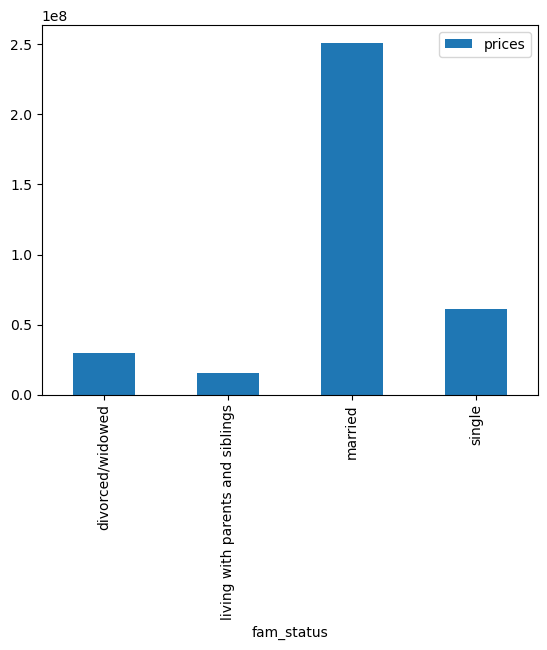

In [16]:
#Sum total revenue for each family status
df[['fam_status','prices']].groupby('fam_status').sum().plot.bar()

# 3 price ranges - high vs. low spender

In [19]:
#Look at differences/similarities btwn price ranges (high and low spender flag)
df.head()

,customer_id,Gender,State,Age,date_joined,n_dependents,fam_status,income,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,new_busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order_price,spending_flag,order_frequency,Check,Regions,customer_profile,order_freq_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Fewest orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,both,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Regularly busy,Fewest orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,both,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN,Regular customer


In [21]:
crosstab = pd.crosstab(df['fam_status'], df['spending_flag'], dropna = False)
crosstab

spending_flag,High spender,Low spender
fam_status,,
divorced/widowed,49316,2528564
living with parents and siblings,27295,1416786
married,418144,20769986
single,92573,4868760


<AxesSubplot:xlabel='fam_status'>

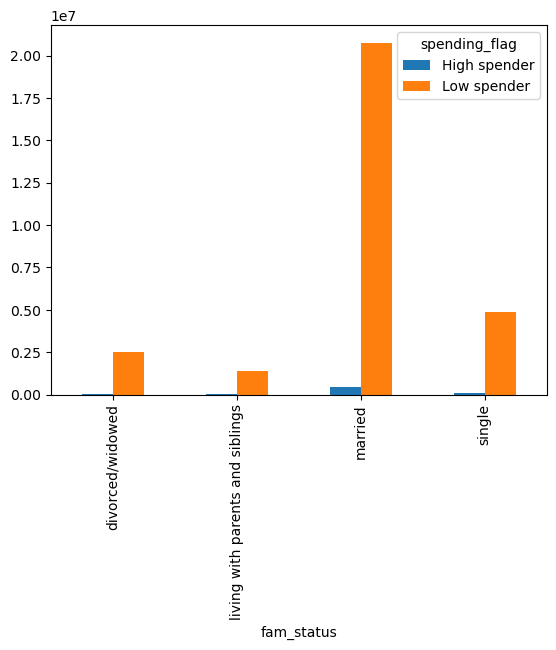

In [22]:
crosstab.plot.bar()

# 5f customer profile cont. 

In [29]:
#Look at profile that ordered the most / most frequently
df_senior = df[df['customer_profile']=="Senior, Family, Pets, High Income"]

Text(0.5, 1.0, 'Most Popular Items from the Pet Department')

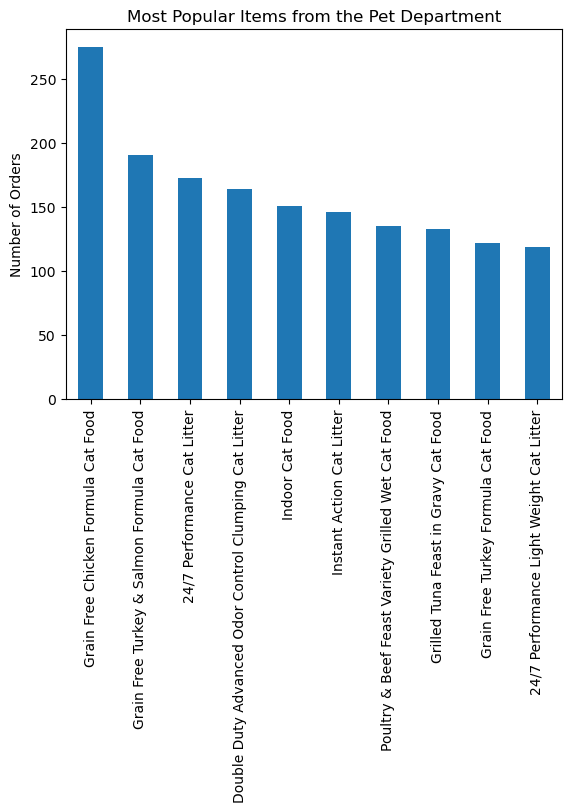

In [33]:
df_senior[df_senior['department_id']==8]['product_name'].value_counts().head(10).plot.bar()
plt.ylabel("Number of Orders")
plt.title("Most Popular Items from the Pet Department")

In [37]:
df_senior

,customer_id,Gender,State,Age,date_joined,n_dependents,fam_status,income,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,new_busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order_price,spending_flag,order_frequency,Check,Regions,customer_profile,order_freq_flag
2435,6965,Male,North Dakota,70,1/1/2017,0,divorced/widowed,100091,2197082,6,0,20,7.0,43875,6,0,both,Baby Food Stage 2 Blueberry Pear & Purple Carrot,92,18,6.5,Mid-range product,Busiest day,Busiest days,Average orders,9,New customer,7.490580,Low spender,7.0,both,Midwest,"Senior, Family, Pets, High Income",Frequent customer
2497,6965,Male,North Dakota,70,1/1/2017,0,divorced/widowed,100091,2197082,6,0,20,7.0,3020,5,0,both,Broccoli & Apple Stage 2 Baby Food,92,18,12.9,Mid-range product,Busiest day,Busiest days,Average orders,9,New customer,7.490580,Low spender,7.0,both,Midwest,"Senior, Family, Pets, High Income",Frequent customer
2513,6965,Male,North Dakota,70,1/1/2017,0,divorced/widowed,100091,2197082,6,0,20,7.0,25371,2,0,both,Organic Banana Blueberry Baby Food Puree,92,18,13.9,Mid-range product,Busiest day,Busiest days,Average orders,9,New customer,7.490580,Low spender,7.0,both,Midwest,"Senior, Family, Pets, High Income",Frequent customer
2514,6965,Male,North Dakota,70,1/1/2017,0,divorced/widowed,100091,1636971,9,0,7,14.0,25371,1,1,both,Organic Banana Blueberry Baby Food Puree,92,18,13.9,Mid-range product,Busiest day,Busiest days,Average orders,9,New customer,7.490580,Low spender,7.0,both,Midwest,"Senior, Family, Pets, High Income",Frequent customer
2529,6965,Male,North Dakota,70,1/1/2017,0,divorced/widowed,100091,2197082,6,0,20,7.0,39977,4,0,both,Pumpkin & Spinach Stage 2 Baby Food,92,18,13.5,Mid-range product,Busiest day,Busiest days,Average orders,9,New customer,7.490580,Low spender,7.0,both,Midwest,"Senior, Family, Pets, High Income",Frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32389874,80008,Female,Rhode Island,73,4/1/2020,1,married,137695,3048815,13,0,22,7.0,4896,11,0,both,"Premium Dog Treats Peanut Butter Flavor, Mediu...",40,8,9.1,Mid-range product,Busiest day,Busiest days,Average orders,51,Loyal customer,7.792547,Low spender,7.0,both,Northeast,"Senior, Family, Pets, High Income",Frequent customer
32389926,80008,Female,Rhode Island,73,4/1/2020,1,married,137695,736939,45,5,18,4.0,13019,6,0,both,Pumpkin & Blueberry Cruncy Dog Treats,40,8,6.3,Mid-range product,Regularly busy,Regularly busy,Average orders,51,Loyal customer,7.792547,Low spender,7.0,both,Northeast,"Senior, Family, Pets, High Income",Frequent customer
32397924,193697,Male,Wisconsin,74,4/1/2020,0,divorced/widowed,102207,1482923,5,3,5,14.0,39578,2,0,both,Organic Go Go Apple Peach Applesauce,92,18,4.9,Low-range product,Regularly busy,Slowest days,Fewest orders,52,Loyal customer,7.166075,Low spender,7.0,both,Midwest,"Senior, Family, Pets, High Income",Frequent customer
32403554,79560,Male,Wyoming,78,4/1/2020,3,married,101764,2996926,3,4,11,11.0,17085,2,0,both,Shampoo & Wash,102,18,1.5,Low-range product,Least busy,Slowest days,Most orders,17,Regular customer,8.134737,Low spender,19.0,both,West,"Senior, Family, Pets, High Income",Regular customer


In [38]:
df[df['customer_profile']=="Senior, Family, Kids, High Income"]

,customer_id,Gender,State,Age,date_joined,n_dependents,fam_status,income,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,new_busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order_price,spending_flag,order_frequency,Check,Regions,customer_profile,order_freq_flag


In [40]:
df['customer_profile'].value_counts(dropna=False)

NaN                                       29874103
Senior, Family, Pets, High Income            83949
Adult, Single, Kids, Low Income              34932
Young adult, Family, Kids, Low Income        32816
Senior, Family, Pets, Low Income             31248
Adult, Single, Kids, High Income             30087
Adult, Family, Pets, Low Income              22280
Adult, Family, Pets, High Income             18942
Young adult, Single, Kids, Low Income        10506
Young adult, Family, Pets, Low Income        10012
Adult, Single, Pets, Low Income               7257
Adult, Single, Pets, High Income              6437
Senior, Single, Pets, High Income             4634
Senior, Single, Pets, Low Income              1581
Young adult, Family, Kids, High Income        1148
Young adult, Family, Pets, High Income         944
Young adult, Single, Kids, High Income         548
Name: customer_profile, dtype: int64

In [41]:
#Re-do customer profile code: noticed wrong value label for "senior, family, kids/pets, high income". 
#drop customer profile column 
df = df.drop(columns =['customer_profile'])

In [42]:
df.head()

,customer_id,Gender,State,Age,date_joined,n_dependents,fam_status,income,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,new_busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order_price,spending_flag,order_frequency,Check,Regions,order_freq_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Fewest orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,both,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Regularly busy,Fewest orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,both,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,Regular customer


In [43]:
#Young Adult, Family, Pet, High Income 
df.loc[(df['Age'] >= 18) & (df['Age'] < 25) & (df['n_dependents'] >0) & (df['department_id']==8) & (df['income'] >99437.73), 'customer_profile'] = 'Young adult, Family, Pets, High Income'

In [44]:
#Young Adult, Single, Pets,High Income  
df.loc[(df['Age'] >= 18) & (df['Age'] < 25) & (df['n_dependents'] ==0) & (df['department_id']==8)& (df['income'] >99437.73), 'customer_profile'] = 'Young adult, Single, Pets, High Income'

In [46]:
#Young Adult, Family, Kids, High Income 
df.loc[(df['Age'] >= 18) & (df['Age'] < 25) & (df['n_dependents'] >0) & (df['department_id']==18) & (df['income'] >99437.73), 'customer_profile'] = 'Young adult, Family, Kids, High Income'

In [48]:
#Young Adult, Single, Kids, High Income 
df.loc[(df['Age'] >= 18) & (df['Age'] < 25) & (df['n_dependents'] ==0) & (df['department_id']==18) & (df['income'] >99437.73), 'customer_profile'] = 'Young adult, Single, Kids, High Income'

In [49]:
#Adult, Family, Pets, High Income  
df.loc[(df['Age'] >= 25) & (df['Age'] < 65) & (df['n_dependents'] >0) & (df['department_id']==8) & (df['income'] >99437.73), 'customer_profile'] = 'Adult, Family, Pets, High Income'

In [50]:
#Adult, Single, Pets, High Income  
df.loc[(df['Age'] >= 25) & (df['Age'] < 65) & (df['n_dependents'] ==0) & (df['department_id']==8) & (df['income'] >99437.73), 'customer_profile'] = 'Adult, Single, Pets, High Income'

In [51]:
#Adult, Single, Kids, High Income
df.loc[(df['Age'] >= 25) & (df['Age'] < 65) & (df['n_dependents'] ==0) & (df['department_id']==18) & (df['income'] >99437.73), 'customer_profile'] = 'Adult, Single, Kids, High Income'

In [64]:
#Senior, Family, Pets, High Income  
df.loc[(df['Age'] >=65) & (df['n_dependents'] >0) & (df['department_id']==8) & (df['income'] >99437.73), 'customer_profile'] = 'Senior, Family, Pets, High Income'

In [65]:
#Senior, Single, Pets, High Income  
df.loc[(df['Age'] >=65) & (df['n_dependents'] ==0) & (df['department_id']==8) & (df['income'] >99437.73), 'customer_profile'] = 'Senior, Single, Pets, High Income'

In [66]:
#Senior, Family, Kids, High Income  
df.loc[(df['Age'] >=65) & (df['n_dependents'] >0) & (df['department_id']==18) & (df['income'] >99437.73), 'customer_profile'] = 'Senior, Family, Kids, High Income'

In [67]:
#Senior, Single, Kids, High Income  
df.loc[(df['Age'] >=65) & (df['n_dependents'] ==0) & (df['department_id']==18) & (df['income'] >99437.73), 'customer_profile'] = 'Senior, Single, Kids, High Income'

In [56]:
#Young Adult, Family, Pet, Low Income 
df.loc[(df['Age'] >= 18) & (df['Age'] < 25) & (df['n_dependents'] >0) & (df['department_id']==8) & (df['income'] <=99437.73), 'customer_profile'] = 'Young adult, Family, Pets, Low Income'


In [57]:
#Young Adult, Single, Pets, Low Income  
df.loc[(df['Age'] >= 18) & (df['Age'] < 25) & (df['n_dependents'] ==0) & (df['department_id']==8)& (df['income'] <=99437.73), 'customer_profile'] = 'Young adult, Single, Pets, Low Income'

In [58]:
#Young Adult, Family, Kids, Low Income 
df.loc[(df['Age'] >= 18) & (df['Age'] < 25) & (df['n_dependents'] >0) & (df['department_id']==18) & (df['income'] <=99437.73), 'customer_profile'] = 'Young adult, Family, Kids, Low Income'

In [59]:
#Young Adult, Single, Kids, Low Income 
df.loc[(df['Age'] >= 18) & (df['Age'] < 25) & (df['n_dependents'] ==0) & (df['department_id']==18) & (df['income'] <=99437.73), 'customer_profile'] = 'Young adult, Single, Kids, Low Income'

In [60]:
#Adult, Family, Pets, Low Income  
df.loc[(df['Age'] >= 25) & (df['Age'] < 65) & (df['n_dependents'] >0) & (df['department_id']==8) & (df['income'] <=99437.73), 'customer_profile'] = 'Adult, Family, Pets, Low Income'

In [61]:
#Adult, Single, Pets, Low Income  
df.loc[(df['Age'] >= 25) & (df['Age'] < 65) & (df['n_dependents'] ==0) & (df['department_id']==8) & (df['income'] <=99437.73), 'customer_profile'] = 'Adult, Single, Pets, Low Income'

In [62]:
#Adult, Single, Kids, Low Income
df.loc[(df['Age'] >= 25) & (df['Age'] < 65) & (df['n_dependents'] ==0) & (df['department_id']==18) & (df['income'] <=99437.73), 'customer_profile'] = 'Adult, Single, Kids, Low Income'

In [63]:
#Senior, Family, Pets, Low Income  
df.loc[(df['Age'] >=65) & (df['n_dependents'] >0) & (df['department_id']==8) & (df['income'] <=99437.73), 'customer_profile'] = 'Senior, Family, Pets, Low Income'

In [68]:
#Senior, Single, Pets, Low Income  
df.loc[(df['Age'] >=65) & (df['n_dependents'] ==0) & (df['department_id']==8) & (df['income'] <=99437.73), 'customer_profile'] = 'Senior, Single, Pets, Low Income'

In [69]:
#Senior, Family, Kids, Low Income  
df.loc[(df['Age'] >=65) & (df['n_dependents'] >0) & (df['department_id']==18) & (df['income'] <=99437.73), 'customer_profile'] = 'Senior, Family, Kids, Low Income'

In [70]:
#Senior, Single, Kids, Low Income  
df.loc[(df['Age'] >=65) & (df['n_dependents'] ==0) & (df['department_id']==18) & (df['income'] <=99437.73), 'customer_profile'] = 'Senior, Single, Kids, Low Income'

In [72]:
df['customer_profile'].value_counts(dropna=False)

NaN                                       29866832
Senior, Family, Kids, High Income            58281
Adult, Single, Kids, Low Income              34932
Young adult, Family, Kids, Low Income        32816
Adult, Single, Kids, High Income             30087
Adult, Family, Pets, Low Income              22280
Senior, Family, Kids, Low Income             20595
Adult, Family, Pets, High Income             18942
Senior, Single, Kids, High Income            17755
Senior, Family, Pets, High Income            13361
Young adult, Single, Kids, Low Income        10506
Young adult, Family, Pets, Low Income         7742
Senior, Single, Kids, Low Income              7585
Adult, Single, Pets, Low Income               7257
Adult, Single, Pets, High Income              6437
Senior, Single, Pets, High Income             4948
Senior, Family, Pets, Low Income              4514
Young adult, Single, Pets, Low Income         2270
Senior, Single, Pets, Low Income              1644
Young adult, Family, Kids, High

In [73]:
#Adult, Family, Kids, Low Income
df.loc[(df['Age'] >= 25) & (df['Age'] < 65) & (df['n_dependents'] >0) & (df['department_id']==18) & (df['income'] <=99437.73), 'customer_profile'] = 'Adult, Family, Kids, Low Income'

In [74]:
#Adult, Family, Kids, High Income
df.loc[(df['Age'] >= 25) & (df['Age'] < 65) & (df['n_dependents'] >0) & (df['department_id']==18) & (df['income'] >99437.73), 'customer_profile'] = 'Adult, Family, Kids, High Income'

In [75]:
df['customer_profile'].value_counts(dropna=False)

NaN                                       29678019
Adult, Family, Kids, Low Income             100804
Adult, Family, Kids, High Income             88009
Senior, Family, Kids, High Income            58281
Adult, Single, Kids, Low Income              34932
Young adult, Family, Kids, Low Income        32816
Adult, Single, Kids, High Income             30087
Adult, Family, Pets, Low Income              22280
Senior, Family, Kids, Low Income             20595
Adult, Family, Pets, High Income             18942
Senior, Single, Kids, High Income            17755
Senior, Family, Pets, High Income            13361
Young adult, Single, Kids, Low Income        10506
Young adult, Family, Pets, Low Income         7742
Senior, Single, Kids, Low Income              7585
Adult, Single, Pets, Low Income               7257
Adult, Single, Pets, High Income              6437
Senior, Single, Pets, High Income             4948
Senior, Family, Pets, Low Income              4514
Young adult, Single, Pets, Low 

Text(0.5, 1.0, 'Number Orders based on Customer Profiles')

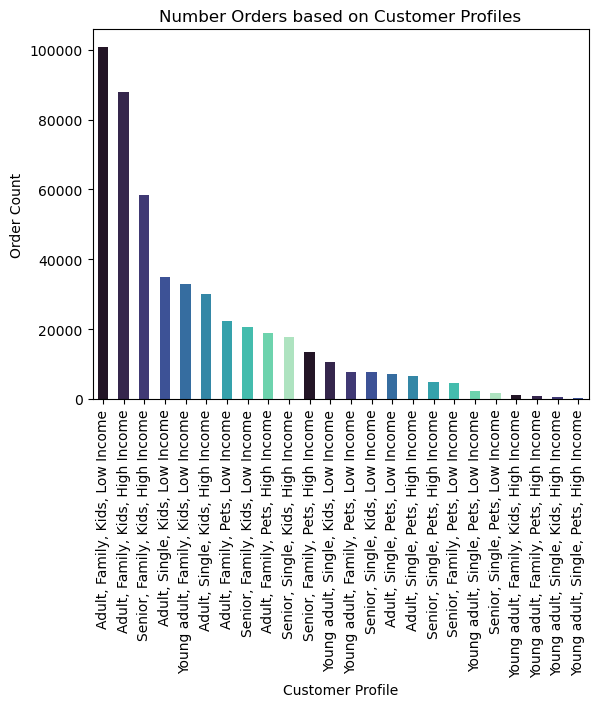

In [76]:
#Redo bar chart: order count by customer profile
df['customer_profile'].value_counts().plot.bar(color = palette)
plt.xlabel("Customer Profile")
plt.ylabel("Order Count")
plt.title("Number Orders based on Customer Profiles")

In [77]:
#Create a chart showing frequency of orders for each customer profile spends
crosstab_cust_prof = pd.crosstab(df['customer_profile'], df['order_freq_flag'], dropna=False)
crosstab_cust_prof

order_freq_flag,Frequent customer,Non-frequent customer,Regular customer
customer_profile,,,
"Adult, Family, Kids, High Income",70926,3197,13886
"Adult, Family, Kids, Low Income",80991,4024,15789
"Adult, Family, Pets, High Income",12766,1484,4692
"Adult, Family, Pets, Low Income",14982,1689,5609
"Adult, Single, Kids, High Income",24065,1116,4906
"Adult, Single, Kids, Low Income",27812,1643,5477
"Adult, Single, Pets, High Income",4284,646,1507
"Adult, Single, Pets, Low Income",4911,430,1916
"Senior, Family, Kids, High Income",47066,2244,8971


Text(0.5, 1.0, 'Order Frequency for each Customer Profile')

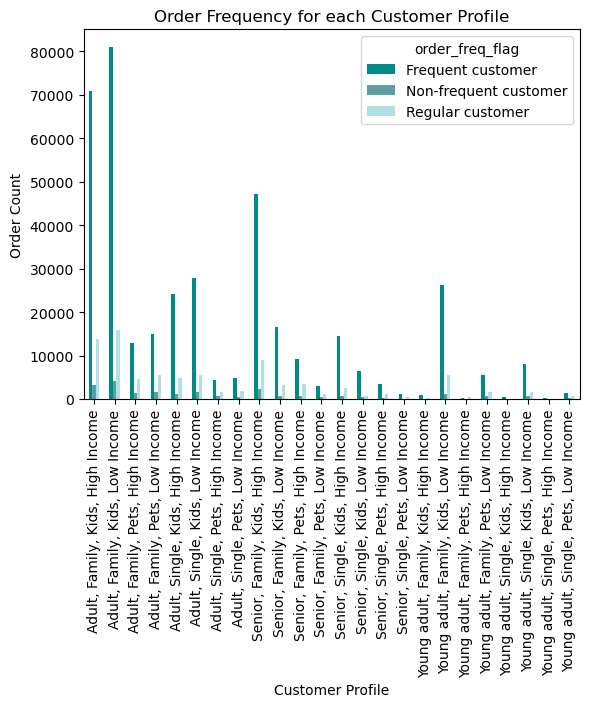

In [78]:
#bar chart of crosstab
crosstab_cust_prof.plot.bar(color =['darkcyan', 'cadetblue', 'powderblue'])
plt.xlabel("Customer Profile")
plt.ylabel("Order Count")
plt.title("Order Frequency for each Customer Profile")

In [86]:
#Look at profile that ordered the most / most frequently
df_senior = df[df['customer_profile']=="Young adult, Single, Kids, Low Income"]

Text(0.5, 1.0, "'Adult, Family, Kids, Low Income'")

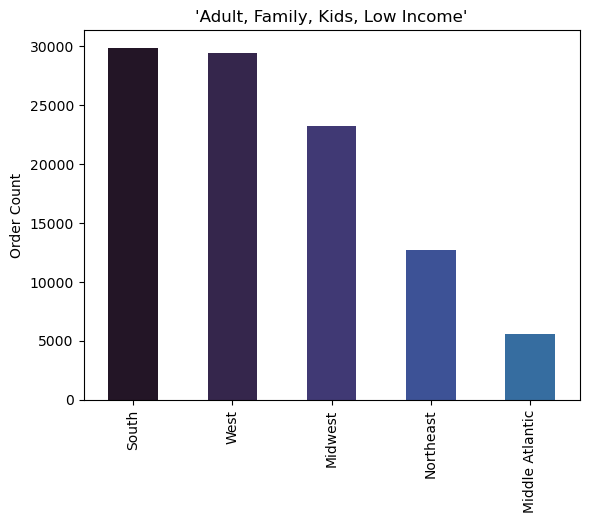

In [83]:
df_senior['Regions'].value_counts().plot.bar(color=palette)
plt.ylabel("Order Count")
plt.title("'Adult, Family, Kids, Low Income'")

Text(0.5, 1.0, "'Young adult, Single, Kids, Low Income'")

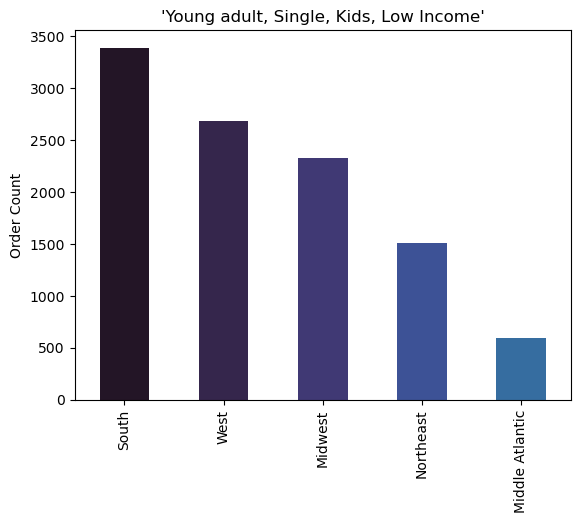

In [87]:
df_senior['Regions'].value_counts().plot.bar(color=palette)
plt.ylabel("Order Count")
plt.title("'Young adult, Single, Kids, Low Income'")